In [ ]:
pip install xgboost

In [ ]:
import numpy as np #make arrays
import pandas as pd #make data frames
import matplotlib.pyplot as plt # make plots
import seaborn as sns # also plots
from sklearn.model_selection import train_test_split #splitting the data
from xgboost import XGBRegressor
from sklearn import metrics #evaluate the model


In [ ]:
calories=pd.read_csv('/content/calories.csv')

In [ ]:
#print the first five rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data=pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#combining the values of data set of exercise and calories
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#checking the numbe rof rows and columns
calories_data.shape

(15000, 9)

In [ ]:
#getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking for the missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

data analysis


In [ ]:
#get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


visualizing the data


In [ ]:
sns.set()

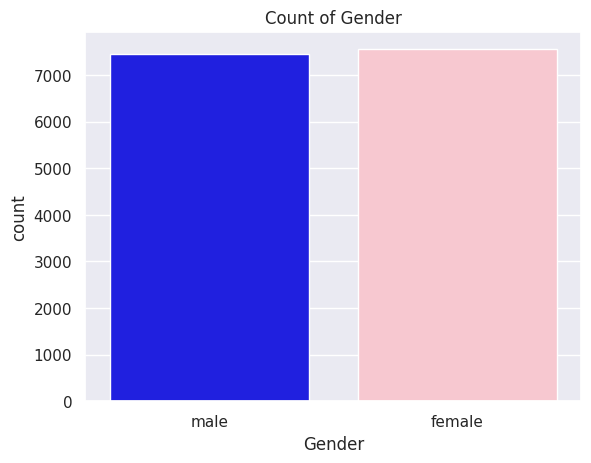

In [ ]:
palette = {'male': 'blue', 'female': 'pink'}

sns.countplot(x='Gender', data=calories_data, hue='Gender', palette=palette)

plt.title('Count of Gender')
plt.xlabel('Gender')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

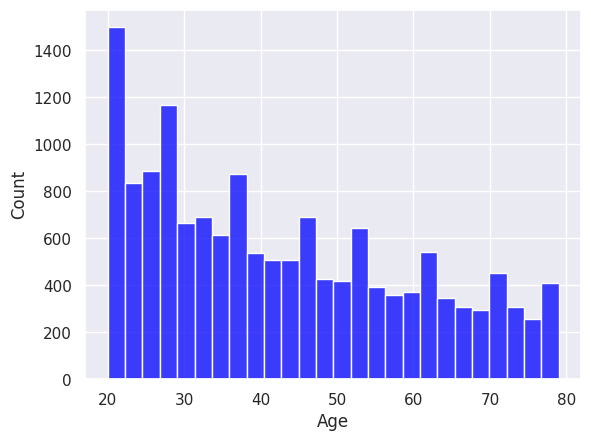

In [ ]:
#finding the distribution of "age" column
sns.histplot(calories_data['Age'],color='Blue')

<Axes: xlabel='Height', ylabel='Count'>

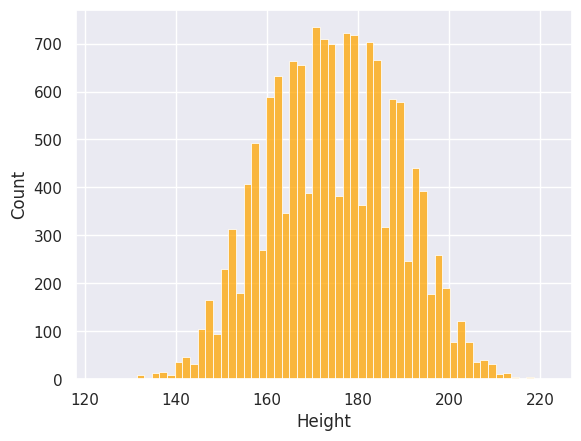

In [ ]:
sns.histplot(calories_data['Height'],color='Orange')

<Axes: xlabel='Weight', ylabel='Count'>

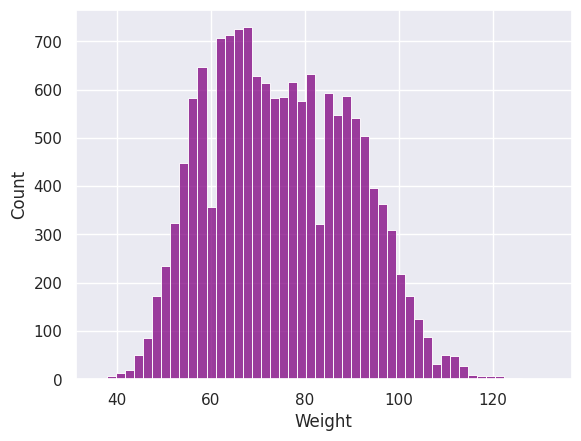

In [ ]:
sns.histplot(calories_data['Weight'],color='Purple')

Finding the correlation in the datset


In [ ]:
numeric_calories_data = calories_data.select_dtypes(include='number')
correlation = numeric_calories_data.corr()


<Axes: >

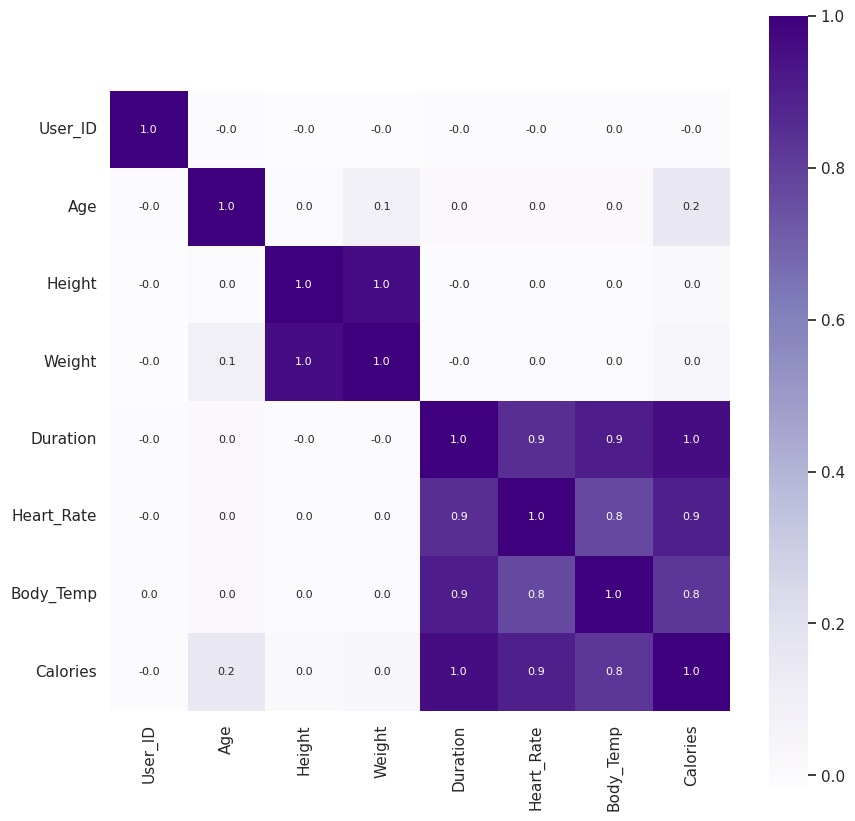

In [ ]:
#constructing a heat map to understamdn the correlation


plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Purples')

converting the text data into numerical values


In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


seperating features and target


In [ ]:
x=calories_data.drop(columns=['User_ID','Calories'],axis=1)
y=calories_data['Calories']

In [ ]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


spliiting the data into training and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


model training

In [ ]:
#loading the model
model=XGBRegressor()

In [ ]:
#training the model with x_train
model.fit(x_train ,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on test data

In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean absolute error

In [ ]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [ ]:
print(mae)

1.4833678883314132


building a predictive system


In [ ]:
input_data = (0, 41, 175.0, 85.0, 25.0, 10.0, 40.7)
numpyarray = np.asarray(input_data)
reshaped = numpyarray.reshape(1, -1)

prediction = model.predict(reshaped)
print(prediction)

[94.24567]
